In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')

In [5]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))

In [6]:
groupDf = df[['user_id', 'Toxicity','week','month']]

In [7]:
groupDf2 = groupDf[['user_id', 'Toxicity','week','month']].astype({'user_id': str, 'week': str, 'month': str})

In [8]:
groupDf2.dtypes

user_id      object
Toxicity    float64
week         object
month        object
dtype: object

In [9]:
unique_values_week = groupDf['week'].unique()
unique_values_month = groupDf['month'].unique()
unique_values_week.sort()
unique_values_month.sort()

In [40]:
unique_values_week

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44'],
      dtype=object)

In [10]:
groupedDf = groupDf2.groupby(['user_id', 'week']).agg({'Toxicity': 'mean'}).reset_index()

In [11]:
groupedDf.head()

,user_id,week,Toxicity
0,100002112,36,0.060252
1,100002112,37,0.056669
2,100002112,38,0.035745
3,100002112,39,0.043688
4,100002112,40,0.077856


In [44]:
weeks = ['01', '02', '03', '04', '05','06','07','08','09','10']
# weeks = ['01']
user_toxicity_means = {}
neighbor_toxicity_means = {}

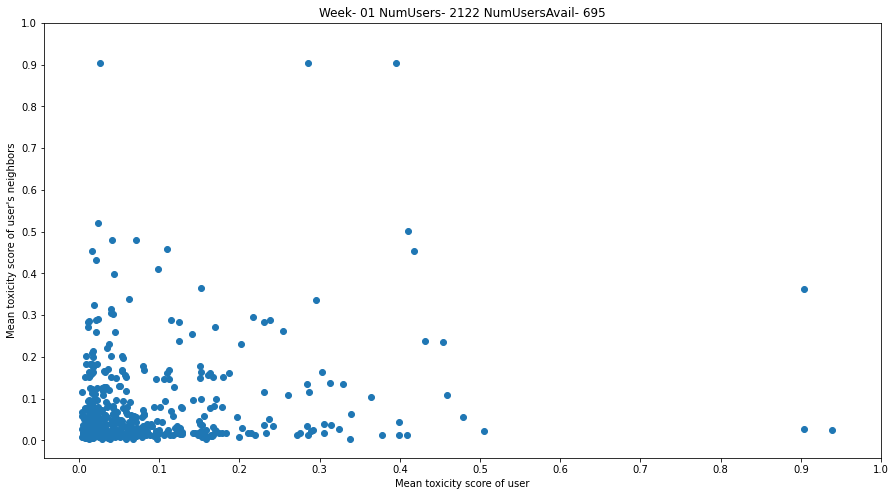

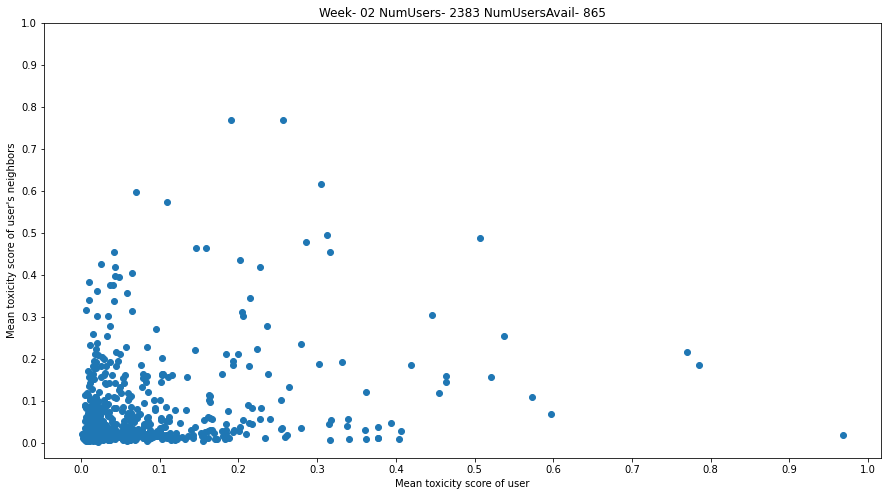

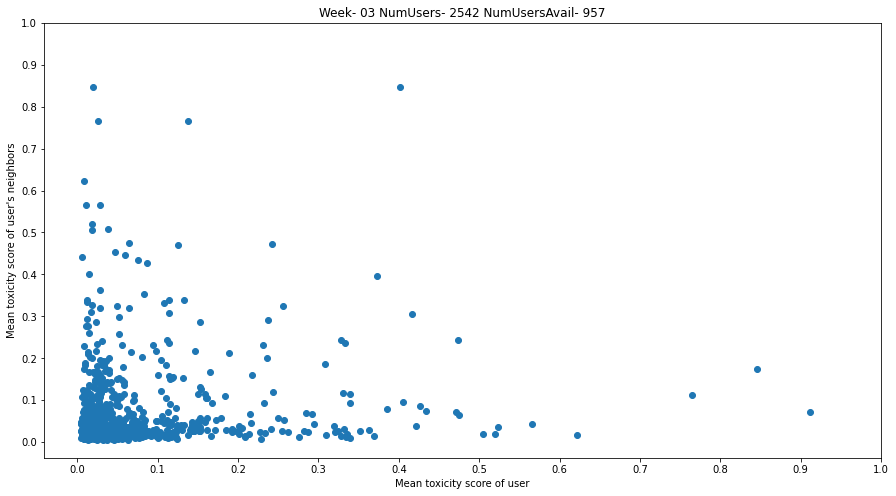

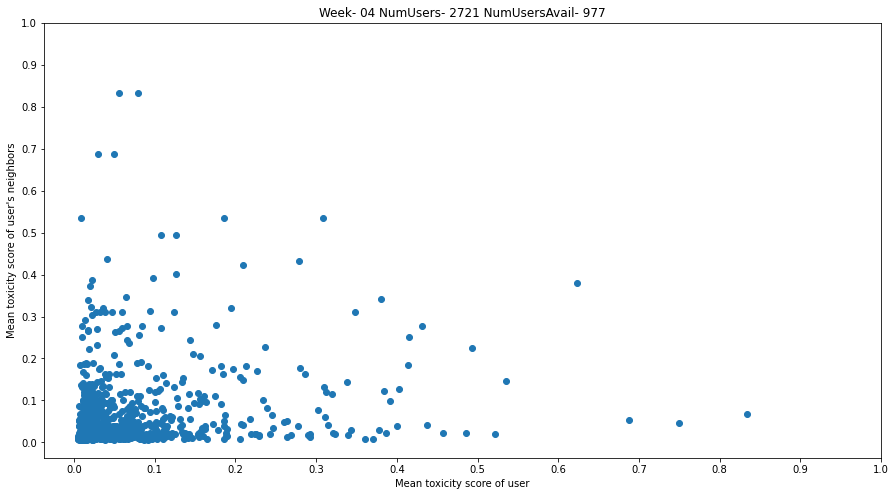

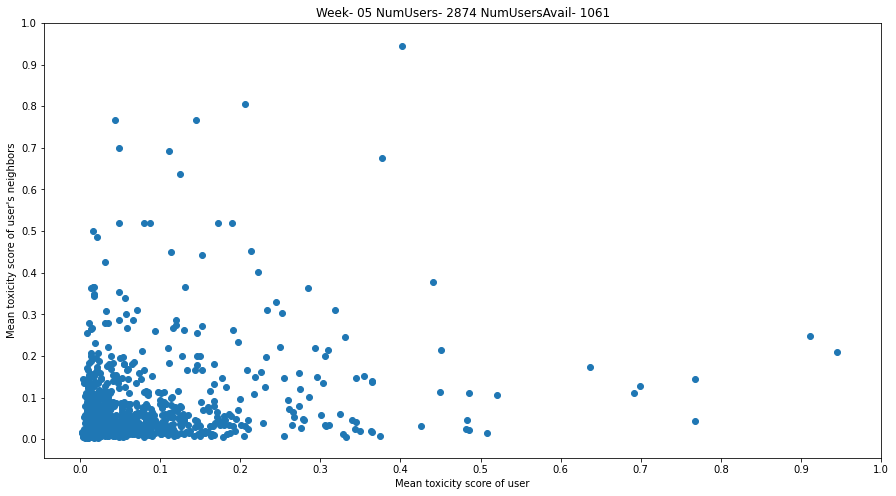

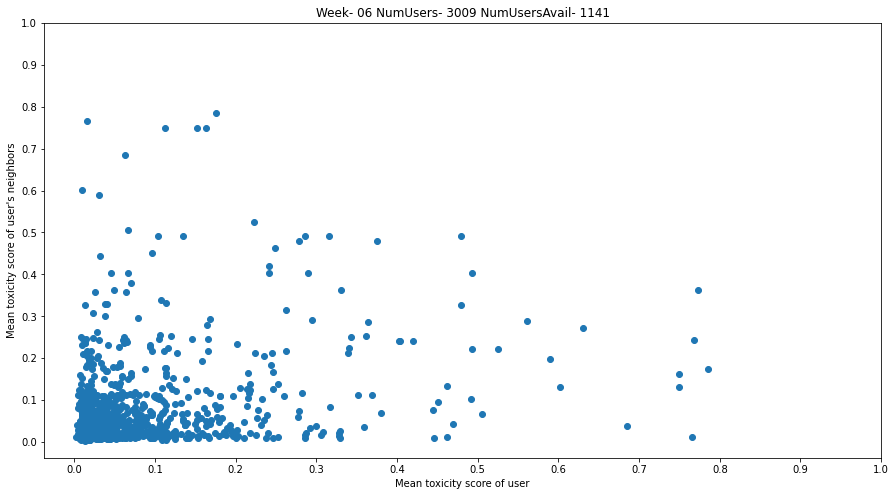

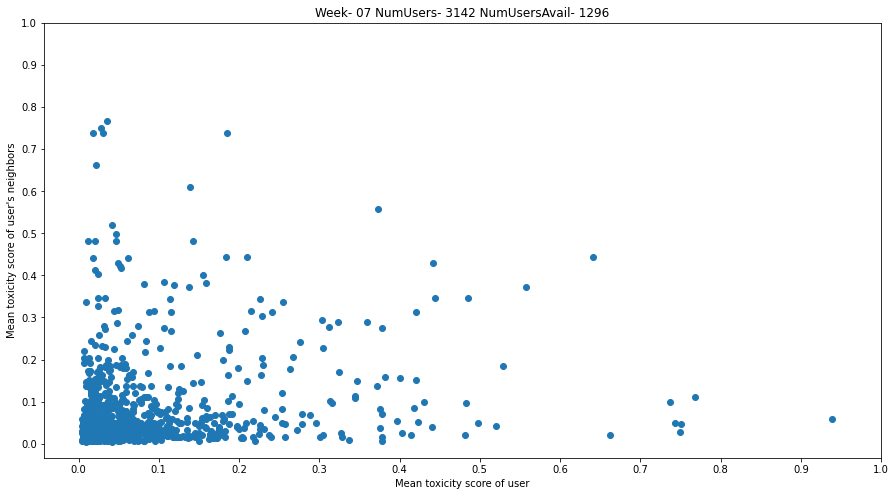

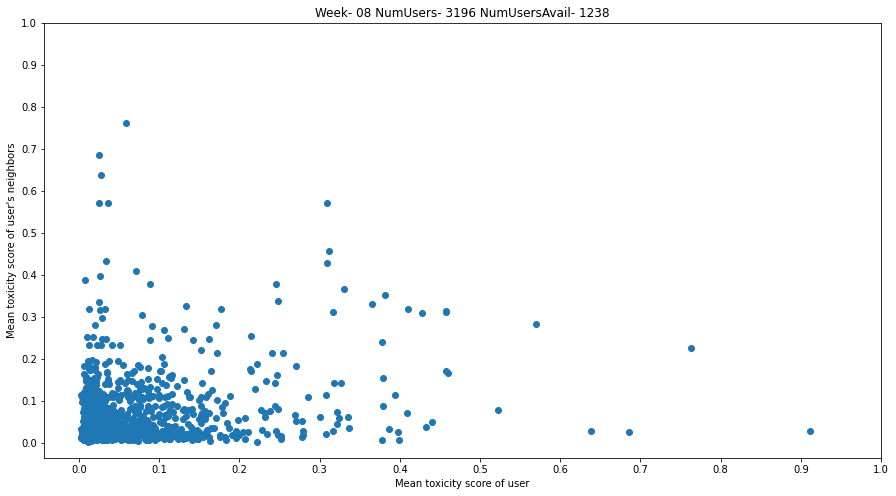

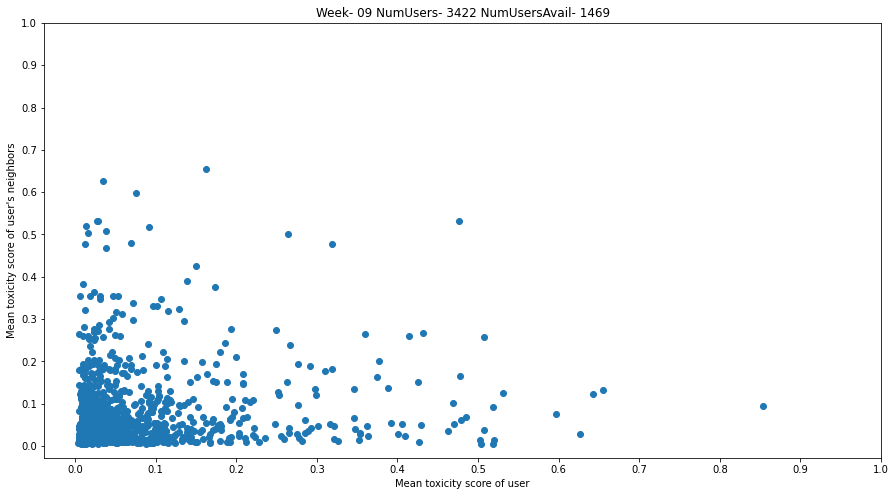

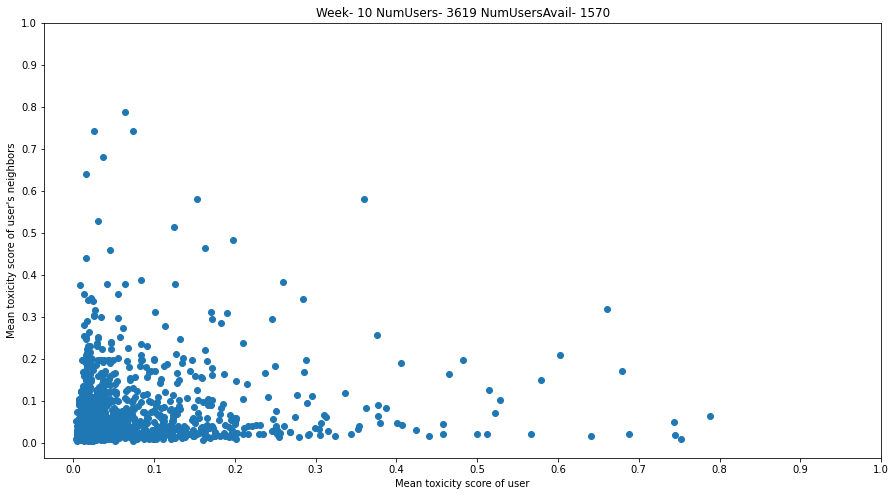

In [45]:
for week in weeks:
  weekDf = groupedDf[groupedDf['week'] == week]
  user_list_week = list(weekDf['user_id'].unique().astype(str))
  G_week = G.subgraph(user_list_week)

  user_toxicity = weekDf.set_index('user_id')['Toxicity'].to_dict()
  neighbor_toxicity = {}
  for user in G_week.nodes():
    neighbors = list(G_week.neighbors(user))
    if user in neighbors:
        neighbors.remove(user)
    if len(neighbors) > 0:
        neighbor_toxicity[user] = weekDf[weekDf['user_id'].isin(neighbors)]['Toxicity'].mean()

  # user_toxicity_means[week] = user_toxicity
  # neighbor_toxicity_means[week] = neighbor_toxicity
  x = [user_toxicity[user] for user in neighbor_toxicity.keys()]
  y = list(neighbor_toxicity.values())

  plt.figure(figsize=(15,8))
  plt.scatter(x, y)
  plt.xlabel('Mean toxicity score of user')
  plt.ylabel('Mean toxicity score of user\'s neighbors')
  plt.title('Week- ' + week+ ' NumUsers- '+ str(G_week.number_of_nodes())+' NumUsersAvail- ' +str(len(y)))
  plt.xticks([i/10 for i in range(0, 11)])
  plt.yticks([i/10 for i in range(0, 11)])

In [29]:
# (neighbor_toxicity_means)

{}

In [38]:
# for week in weeks:
#   weekDf = groupedDf[groupedDf['week'] == week]
#   user_list_week = list(weekDf['user_id'].unique().astype(str))
#   G_week = G.subgraph(user_list_week)

#   user_toxicity = weekDf.set_index('user_id')['Toxicity'].to_dict()
#   neighbor_toxicity = {}
#   for user in G_week.nodes():
#     neighbors = list(G_week.neighbors(user))
#     neighbor_toxicity[user] = weekDf[weekDf['user_id'].isin(neighbors)]['Toxicity'].mean()

#   user_toxicity_means[week] = user_toxicity
#   neighbor_toxicity_means[week] = neighbor_toxicity

#   plt.figure(figsize=(15,8))
#   plt.scatter(user_toxicity.values(), neighbor_toxicity.values())
#   plt.xlabel('Mean toxicity score of user')
#   plt.ylabel('Mean toxicity score of user\'s neighbors')
#   plt.title('Week- ' + week+ ' Number of Users- '+ str(G_week.number_of_nodes()))
#   plt.xticks([i/10 for i in range(0, 11)])
#   plt.yticks([i/10 for i in range(0, 11)])


In [39]:
# For just a single user
'''
fix_user_id = "714557249604227075"
neighbor_user_list = list(G_week.neighbors(fix_user_id))
neighbourDf = weekDf[weekDf['user_id'].astype(str) == "714557249604227075"]
mean_toxicity = neighbourDf['Toxicity'].mean()
'''
'''
user = "1009663466"
neighbor_toxicity = {}
neighbors = list(G_week.neighbors(user))
if user in neighbors:
      neighbors.remove(user)
if len(neighbors) > 0:
    neighbor_toxicity[user] = weekDf[weekDf['user_id'].isin(neighbors)]['Toxicity'].mean()
neighbor_toxicity
user_toxicity.get(user)
'''

'\nfix_user_id = "714557249604227075"\nneighbor_user_list = list(G_week.neighbors(fix_user_id))\nneighbourDf = weekDf[weekDf[\'user_id\'].astype(str) == "714557249604227075"]\nmean_toxicity = neighbourDf[\'Toxicity\'].mean()\n'

In [40]:
# def get_neighbour_toxicity_mean(user):
#   neighbours = list(G_week.neighbors(user))
#   temp_list = []
#   for neigh in neighbours:
#     neighbourDf = weekDf[weekDf['user_id']==neigh]
#     mean_toxicity = neighbourDf['Toxicity'].mean()
#     temp_list.append(mean_toxicity)
#   return sum(temp_list)/len(temp_list)

# def get_user_toxicity_mean(user):
#   userDf = weekDf[weekDf['user_id']==user]
#   return userDf['Toxicity'].mean()

# user_toxicity_means = []
# neighbor_toxicity_means = []
# for user in G_week.nodes():
#   user_mean = get_user_toxicity_mean(user)
#   neighbour_mean = get_neighbour_toxicity_mean(user)
#   user_toxicity_means.append(user_mean)
#   neighbor_toxicity_means.append(neighbour_mean)

In [41]:
'''
I have a users.edges file which has a edgelist for all the users. Each node here is a user id. 

And now I have a tweets.csv file. which has the following columns: -
1) user_id - contains the id's of the user
2) tweet_id - contains the id's of the tweet. A same user may have multiple tweets
3) Toxicity - contains the toxicity score for each tweet. 

now looking at the users.edges file, how do I find the neighbors of a user and calculate the mean toxicity score of all the tweets that the neighbors have done? 
after this I also want to calculate the mean toxicity score of the tweets that the user has done. 

I want to do this for all the users, and after that make a scatter plot, where each user is a dot on the plot and 
x axis - mean of the toxicity scores of the user
y axis - mean of the toxicity scores of the user's neighbor. 

How do I do this in python?
'''

"\nI have a users.edges file which has a edgelist for all the users. Each node here is a user id. \n\nAnd now I have a tweets.csv file. which has the following columns: -\n1) user_id - contains the id's of the user\n2) tweet_id - contains the id's of the tweet. A same user may have multiple tweets\n3) Toxicity - contains the toxicity score for each tweet. \n\nnow looking at the users.edges file, how do I find the neighbors of a user and calculate the mean toxicity score of all the tweets that the neighbors have done? \nafter this I also want to calculate the mean toxicity score of the tweets that the user has done. \n\nI want to do this for all the users, and after that make a scatter plot, where each user is a dot on the plot and \nx axis - mean of the toxicity scores of the user\ny axis - mean of the toxicity scores of the user's neighbor. \n\nHow do I do this in python?\n"

In [42]:
'''
I have a edgelist file called users.edgelist. This file contains the edges for a graph. The nodes in this graph are the users_id's.
I also have a csv file called the tweets.csv file. In this csv file, I have a column called user_id. 
Now the users.edgelist file contains more number of users than the tweets.csv user_id column file. 
How do I make sure that the users.edgelist file only contains the users from the user_id column in the tweets.csv file.
''' 

"\nI have a edgelist file called users.edgelist. This file contains the edges for a graph. The nodes in this graph are the users_id's.\nI also have a csv file called the tweets.csv file. In this csv file, I have a column called user_id. \nNow the users.edgelist file contains more number of users than the tweets.csv user_id column file. \nHow do I make sure that the users.edgelist file only contains the users from the user_id column in the tweets.csv file.\n"

In [43]:
'''
I am working on a Twitter dataset. 
I have a graph G which is loaded in networkx via an edgelist file. This graph contains users id's as nodes. 

And now I have a tweets.csv file. which has the following columns: -
1) user_id - contains the id's of the user
2) tweet_id - contains the id's of the tweet. A same user may have multiple tweets
3) Toxicity - contains the toxicity score for each tweet. 
4) Week - contains the week number for a tweet.
A user_id has multiple tweet_id's and toxicity scores. 

how do I find the neighbours of a user and calculate the mean toxicity score of all the tweets that the neighbours have done? 
after this, I also want to calculate the mean toxicity score of the tweets that the user has done. 

and after that make a scatter plot, where 
x axis - mean of the toxicity scores of the user
y axis - mean of the toxicity scores of the user's neighbour. 
Here each user would be a dot on this scatter plot

How do I do this in python?
'''

"\nI am working on a Twitter dataset. \nI have a graph G which is loaded in networkx via an edgelist file. This graph contains users id's as nodes. \n\nAnd now I have a tweets.csv file. which has the following columns: -\n1) user_id - contains the id's of the user\n2) tweet_id - contains the id's of the tweet. A same user may have multiple tweets\n3) Toxicity - contains the toxicity score for each tweet. \n4) Week - contains the week number for a tweet.\nA user_id has multiple tweet_id's and toxicity scores. \n\nhow do I find the neighbours of a user and calculate the mean toxicity score of all the tweets that the neighbours have done? \nafter this, I also want to calculate the mean toxicity score of the tweets that the user has done. \n\nand after that make a scatter plot, where \nx axis - mean of the toxicity scores of the user\ny axis - mean of the toxicity scores of the user's neighbour. \nHere each user would be a dot on this scatter plot\n\nHow do I do this in python?\n"

In [44]:
'''
groupDf = df[['user_id', 'Toxicity','week','month']]
weekDf = groupDf[groupDf['week']=="01"]
user_list_week = list(weekDf['user_id'].unique().astype(str))
G_week = G.subgraph(user_list_week)
def get_neighbour_toxicity_mean(user):
  neighbours = list(G_week.neighbors(user))
  temp_list = []
  for neigh in neighbours:
    neighbourDf = weekDf[weekDf['user_id'].astype(str) ==neigh]
    mean_toxicity = neighbourDf['Toxicity'].mean()
    temp_list.append(mean_toxicity)
  return sum(temp_list)/len(temp_list)
def get_user_toxicity_mean(user):
  userDf = weekDf[weekDf['user_id'].astype(str) ==user]
  return userDf['Toxicity'].mean()
user_toxicity_means = []
neighbor_toxicity_means = []
for user in G_week.nodes():
  user_mean = get_user_toxicity_mean(user)
  neighbour_mean = get_neighbour_toxicity_mean(user)
  user_toxicity_means.append(user_mean)
  neighbor_toxicity_means.append(neighbour_mean)
plt.figure(figsize=(15,10))
plt.scatter(user_toxicity_means, neighbor_toxicity_means)
plt.xlabel('Mean toxicity score of user')
plt.ylabel('Mean toxicity score of user\'s neighbors')

plt.xticks([i/10 for i in range(0, 11)])
plt.yticks([i/10 for i in range(0, 11)])
plt.show()

this code is plotting a plot for one week, what if I want to plot plots for 10 weeks? how do I change the code to do that? 
'''

'\ngroupDf = df[[\'user_id\', \'Toxicity\',\'week\',\'month\']]\nweekDf = groupDf[groupDf[\'week\']=="01"]\nuser_list_week = list(weekDf[\'user_id\'].unique().astype(str))\nG_week = G.subgraph(user_list_week)\ndef get_neighbour_toxicity_mean(user):\n  neighbours = list(G_week.neighbors(user))\n  temp_list = []\n  for neigh in neighbours:\n    neighbourDf = weekDf[weekDf[\'user_id\'].astype(str) ==neigh]\n    mean_toxicity = neighbourDf[\'Toxicity\'].mean()\n    temp_list.append(mean_toxicity)\n  return sum(temp_list)/len(temp_list)\ndef get_user_toxicity_mean(user):\n  userDf = weekDf[weekDf[\'user_id\'].astype(str) ==user]\n  return userDf[\'Toxicity\'].mean()\nuser_toxicity_means = []\nneighbor_toxicity_means = []\nfor user in G_week.nodes():\n  user_mean = get_user_toxicity_mean(user)\n  neighbour_mean = get_neighbour_toxicity_mean(user)\n  user_toxicity_means.append(user_mean)\n  neighbor_toxicity_means.append(neighbour_mean)\nplt.figure(figsize=(15,10))\nplt.scatter(user_toxicity_

In [45]:
#full code
'''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))
groupDf = df[['user_id', 'Toxicity','week','month']]
unique_values_week = groupDf['week'].unique()
unique_values_month = groupDf['month'].unique()
unique_values_week.sort()
unique_values_month.sort()
weeks = ['01', '02', '03', '04', '05']

for week in weeks:
    weekDf = groupDf[groupDf['week']==week]
    user_list_week = list(weekDf['user_id'].unique().astype(str))
    G_week = G.subgraph(user_list_week)

    def get_user_toxicity_mean(user):
      userDf = weekDf[weekDf['user_id'].astype(str) ==user]
      return userDf['Toxicity'].mean()
    
    def get_neighbour_toxicity_mean(user):
      neighbours = list(G_week.neighbors(user))
      neighbours.remove(user)
      temp_list = []
      for neigh in neighbours:
        neighbourDf = weekDf[weekDf['user_id'].astype(str) ==neigh]
        mean_toxicity = neighbourDf['Toxicity'].mean()
      return sum(temp_list)/len(temp_list)

    user_toxicity_means = []
    neighbor_toxicity_means = []
    
    for user in G_week.nodes():
        user_mean = get_user_toxicity_mean(user)
        neighbour_mean = get_neighbour_toxicity_mean(user)
        user_toxicity_means.append(user_mean)
        neighbor_toxicity_means.append(neighbour_mean)
    
    plt.figure(figsize=(15,8))
    plt.scatter(user_toxicity_means, neighbor_toxicity_means)
    plt.xlabel('Mean toxicity score of user')
    plt.ylabel('Mean toxicity score of user\'s neighbors')
    plt.title('Week- ' + week+ ' Number of Users- '+ str(G_week.number_of_nodes()))
    plt.xticks([i/10 for i in range(0, 11)])
    plt.yticks([i/10 for i in range(0, 11)])
    plt.show()
'''

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport matplotlib.ticker as ticker\nimport numpy as np\nfrom datetime import datetime\nimport networkx as nx\nimport warnings\nwarnings.filterwarnings("ignore")\n\ndf = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")\nG = nx.read_edgelist(\'/content/gdrive/My Drive/users.edgelist\')\ndf["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))\ndf["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))\ndf["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))\ngroupDf = df[[\'user_id\', \'Toxicity\',\'week\',\'month\']]\nunique_values_week = groupDf[\'week\'].unique()\nunique_values_month = groupDf[\'month\'].unique()\nunique_values_week.sort()\nunique_values_month.sort()\nweeks = [\'01\', \'02\', \'03\', \'04\', \'05\']\n\nfor week in weeks:\n    we

In [46]:
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))

# group the data by user and week
groupDf = df.groupby(['user_id', 'week']).agg({'Toxicity': 'mean'}).reset_index()

weeks = ['01', '02', '03', '04', '05']
user_toxicity_means = {}
neighbor_toxicity_means = {}

# loop over weeks
for week in weeks:
    weekDf = groupDf[groupDf['week'] == week]
    user_list_week = list(weekDf['user_id'].unique().astype(str))
    G_week = G.subgraph(user_list_week)

    # calculate the mean toxicity score of each user and their neighbors
    user_toxicity = weekDf.set_index('user_id')['Toxicity'].to_dict()
    neighbor_toxicity = {}
    for user in G_week.nodes():
        neighbors = list(G_week.neighbors(user))
        neighbors.remove(user)
        neighbor_toxicity[user] = weekDf[weekDf['user_id'].isin(neighbors)]['Toxicity'].mean()

    # store the results in dictionaries
    user_toxicity_means[week] = user_toxicity
    neighbor_toxicity_means[week] = neighbor_toxicity

    # plot the data
    plt.figure(figsize=(15,8))
    plt.scatter(user_toxicity.values(), neighbor_toxicity.values())
    plt.xlabel('Mean toxicity score of user')
    plt.ylabel('Mean toxicity score of user\'s neighbors')
    plt.title('Week- ' + week+ ' Number of Users- '+ str(G_week.number_of_nodes()))
    plt.xticks([i/10 for i in range(0, 11)])
    plt.yticks([i/10 for i in range(0, 11)])

'''

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom datetime import datetime\nimport networkx as nx\nimport warnings\nwarnings.filterwarnings("ignore")\n\ndf = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")\nG = nx.read_edgelist(\'/content/gdrive/My Drive/users.edgelist\')\ndf["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))\ndf["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))\ndf["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))\n\n# group the data by user and week\ngroupDf = df.groupby([\'user_id\', \'week\']).agg({\'Toxicity\': \'mean\'}).reset_index()\n\nweeks = [\'01\', \'02\', \'03\', \'04\', \'05\']\nuser_toxicity_means = {}\nneighbor_toxicity_means = {}\n\n# loop over weeks\nfor week in weeks:\n    weekDf = groupDf[groupDf[\'week\'] == week]\n    u

In [ ]:
'''
in the code that you shared above, I want to make some changes

neighbor_toxicity = {}
    for user in G_week.nodes():
        neighbors = list(G_week.neighbors(user))
        neighbor_toxicity[user] = weekDf[weekDf['user_id'].isin(neighbors)]['Toxicity'].mean()

in this code snippet, the 'neighbors' variable is giving me the list of user, but sometimes the user itself is its neighbor too, so if thats the case, i want to remove the user from the neighbors list. and in some cases, the only neighbor of the user is the user itself, in that case, I want to discard the user completely from the plot. 
'''